# Evaluation terminale : Machine learning & python -- TO Jérémy

Cet examen se compose de 3 parties : 
<ol>
  <li>Restitution théorique</li>
  <li>Restitution pratique</li>
  <li>Cas pratique</li>
</ol>

## Partie 1 : Restitution théorique

Pour cette partie, l'objectif est de décrire des notions théoriques. Essayez de rédiger des réponses claires en utilisant vos mots.

#### Question 1.1: Donner une définition du machine learning. Eviter de recopier de wikipédia, essayer d'en donner une description en quelques mots.

Le machine learning est un domaine de l'intelligence artificielle qui consiste à donner à des machines la capacité d'apprendre sans avoir été explicitement programmées pour effectuer certaines tâches. Cela se fait en leur fournissant un grand nombre de données et cela permet de découvrir des modèles de tests.

#### Question 1.2: Donner quelques applications concrètes d'utilisation du machine learning.

Il existe quelque applications concrètes d'utilisation du machine learning :

Dans le domaine de la santé, cela permet de prédire les récidives de maladies et identifier les patients qui ont des risques importants.

Dans le domaine de l'industrie, le maching learning permet de prédire les maintenances des équipements ainsi que leurs processus.

Pour le domaine du marketing, cela permet de prédire les comportements d'achat des clients et adapter leurs publicités.

#### Question 1.3: Quelles sont les 2 principales familles "d'apprentissage"? Donner une rapide définition de chacune

Il y a principalement 2 familles d'apprentissage : l'apprentissage supervisé et l'apprentissage non supervisé.

L'apprentissage supervisé permet aux machines d'être entrainées à partir des données étiquetées, des données annotées par des humains pour indiquer les sorties attendues.

L'apprentissage non supervisé permet aux machines d'être entrainées à partir de données non étiquetées, des données qui ne sont pas annotées par des huamins.

#### Question 1.4: Dans laquelle de ces familles appartient la "classification"? Le "clustering"?

La famille de l'apprentissage supervisé appartient à la famille de la classification et l'apprentissage non supervisé appartient à la famille du clustering.

#### Question 1.5: Définissez ce qu'est un arbre de décision et décrivez  de manière simple sa construction.

Un arbre de décision est un algorithme de classification utilisé en apprentissage supervisé. Il permet de prédire la valeur de quelque chose en se basant sur des caractéristiques observées.

La construction d'un arbre de décision se fait par la selection d'une caractéristique qui permet de mieux séparer les observations en fonction de la cible. On continue en divisant récursivement le jeu de données en sous-ensembles plus petits jusqu'à ce qu'il n'y ait plus qu'une seule observation dans chaque feuille de l'arbre.

La prédiction de chaque valeur de la cible pour une nouvelle observation se fait par le parcours de l'arbre en suivant les branches qui correspondent aux valeurs de chaque caractéristique de l'observation jusqu'à arriver à une feuille, qui contient la prédiction pour cette observation.

#### Question 1.6: Dans quelle situation parle-t-on "d'overfitting"?

Réponse 

## Partie 2 : Etude d'un cas pratique

Pour cette partie, vous devrez vous inspirer des TP réalisés en cours. 

Il vous faut importer les librairies qui vous seront nécessaires répondre à la problèmatique dans la cellule suivante :

In [1]:
# packages
import pandas as pd
#...
from pandas_profiling import ProfileReport
# importing packages
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

Importez les données comme suit :

In [2]:
data = pd.read_csv('nba_logreg.csv')

Ce jeu de données décrit les caracteristiques de jeu de joueurs de Basketball au sein de la NBA. La variable d'intérêt Y est "TARGET_5yrs". La description de ce dataset se trouve dans le fichier "NBA_variables_doc.png"

__L'objectif du problème est de réussir à prédire si un jeune joueur durera plus ou moins que 5ans au sein de la ligue.__

In [9]:
data

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


#### Question 2.1: Donnez au moins une colonne qui doit être enlevé du jeu de données. Pourquoi? 

Une colonne qui doit être enlevé du jeu de données est la colonne "Name".

#### Exercice 2.1: Enlevez les variables du dataset qui vous semble inutile au problème.

In [5]:
data.drop(columns=['Name'],axis=1, inplace=True)

#### Question 2.2: Ce dataset contient - il des données manquantes ou non exploitable?

Ce dataset contient des donnée manquantes dans la colonne "3P%".

#### Exercice 2.2: Si oui, donnez en la proportion par colonne.

In [11]:
data.drop(columns=['3P%'],axis=1, inplace=True)

KeyError: "['3P%'] not found in axis"

#### Exercice 2.3: Séparez les données en 2 échantillons train-test

In [14]:
Y = data['TARGET_5Yrs']
X = data.drop(labels=['TARGET_5Yrs'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

#### Question 2.3: Pourquoi cette étape est-elle indispensable?

Cette étape est indispensable car elle permet d'évaluer la performance d'un modèle de maching learning sur des données inconnues.

#### Exercice 2.4: Entrainez sur ces données un arbre de décision. Calculer une prédiction.

In [25]:
clf = DecisionTreeClassifier()

#### Exercice 2.5: Evaluez la qualité du modèle. 

In [26]:
#Fitting
clf = clf.fit(X_train, Y_train)
#Estimate
estimate = clf.predict_proba(X_test)[:,1]
true = Y_test
#AUC
fpr, tpr, _ = roc_curve(Y_test,  estimate)
auc_ = auc(fpr, tpr)
print(auc_)

0.5981412780133253


#### Question 2.4: Quelle métrique utilisez vous? Pourquoi? 

J'utilise la métrique de l'AUC car elle permet d'évaluer des modèles de classification binaire. 

#### Question 2.5: Le modèle construit est-il de qualité satisfaisante? Expliquez.

Le modèle construit est de qualité mauvaise car l'AUC est de 0,59. L'hétérogénéité des données est conséquente dans ce dataset.

#### Exercice 2.6: Produisez une visualisation graphique de l'arbre construit

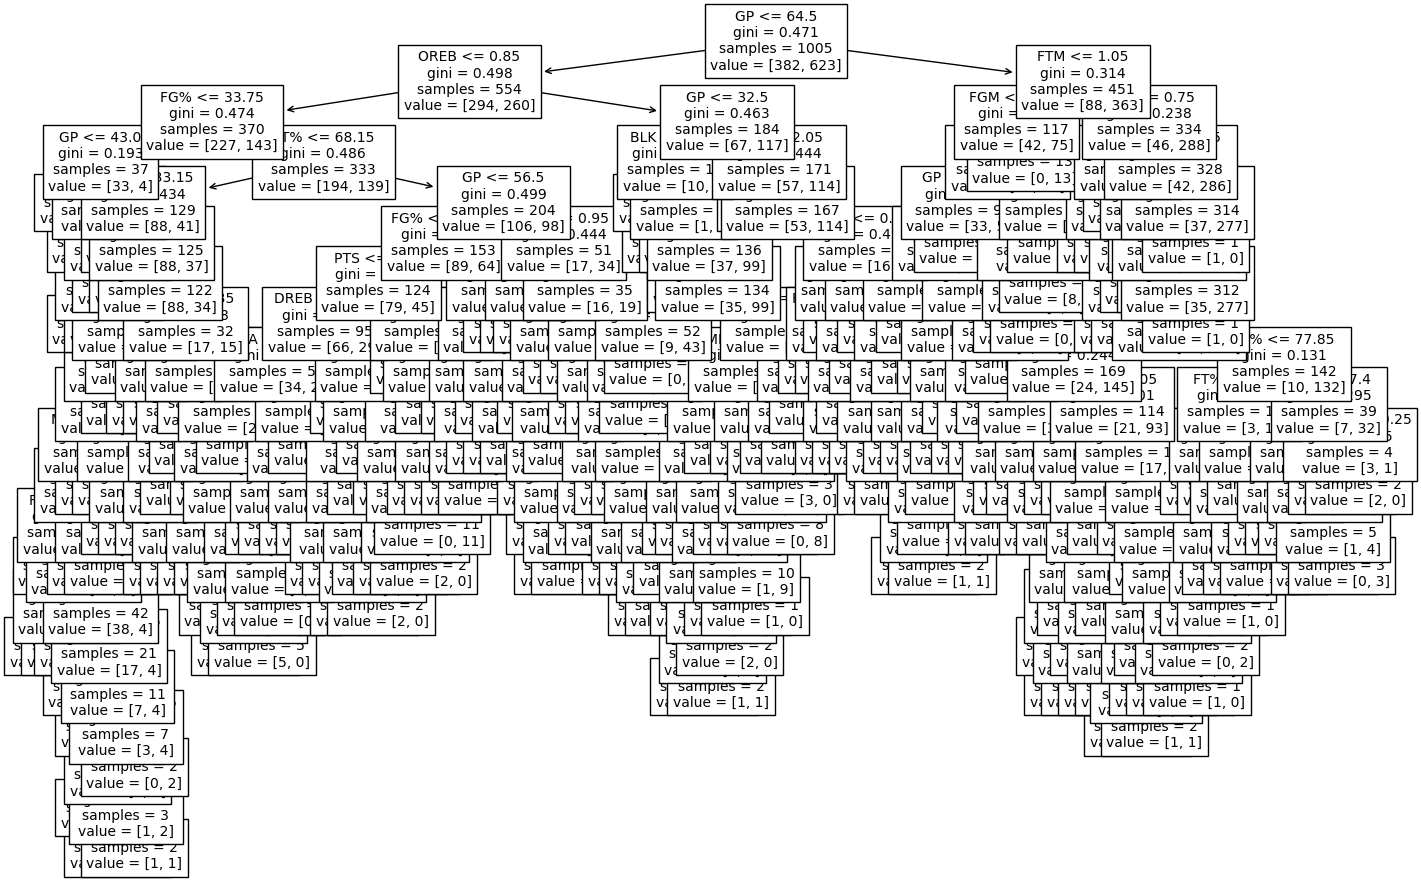

In [28]:
plt.figure(figsize=(17,11))
plot_tree(clf, feature_names = list(X_train.columns), fontsize=10)
plt.show()

#### Question 2.6: Donnez un exemple de lecture d'un tel arbre.

Pour la lecture d'un tel arbre, on pourrait commencer les branches et les feuilles les plus à gauche et finir sur les branches et feuilles à droite.

#### Question 2.7: Comment peut - on améliorer la qualité du modèle? Donnez au moins 3 méthodes:

Pour améliorer la qualité du modèle, on pourrait utiliser 3 méthodes différentes : le classifieur, la grid search et l'AUC.

#### Exercice 2.7: Essayer d'appliquer une de ces méthodes

best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 0.01, 'random_state': 42}
best auc: 0.7062433475391416


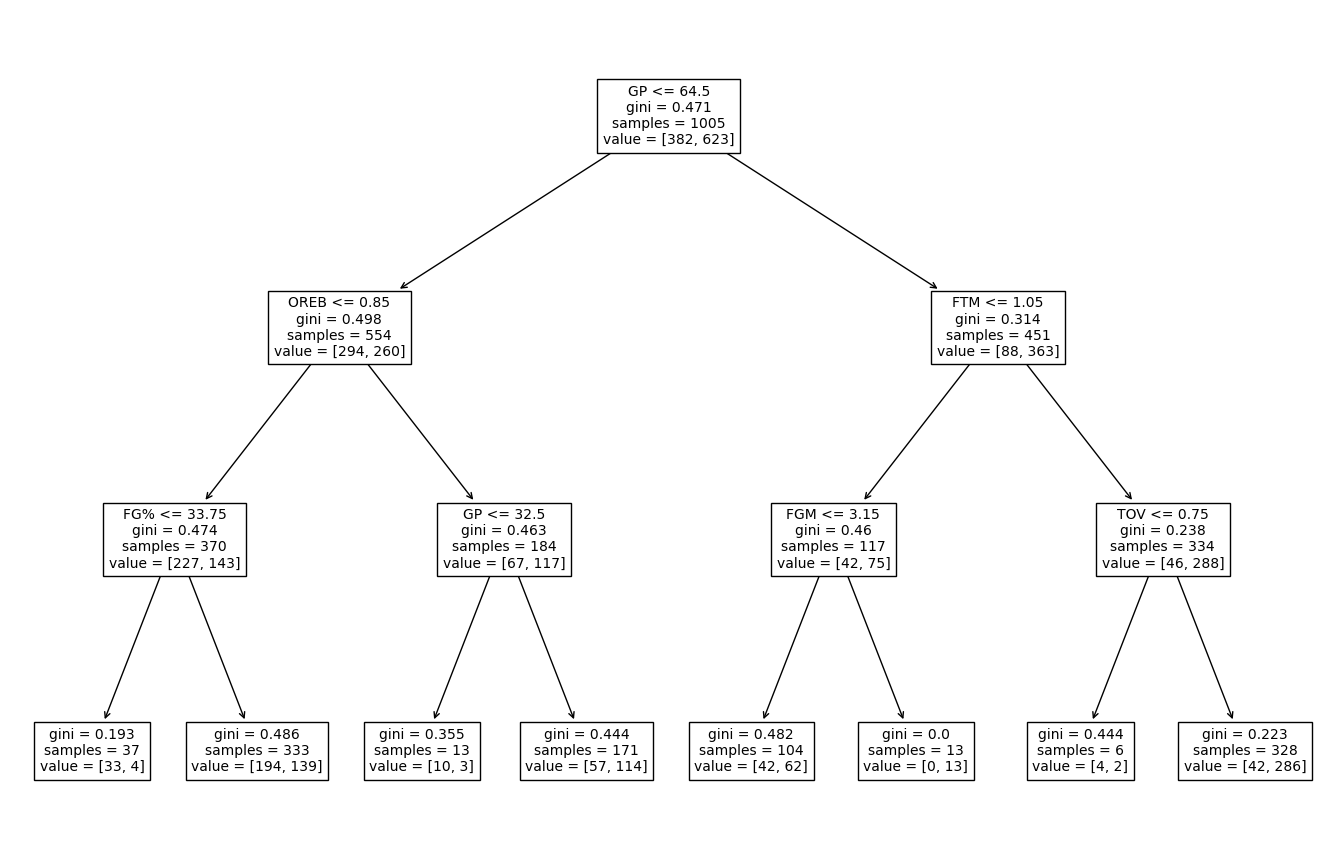

In [35]:
# Hyperparameters space
param_space = {'criterion':[ 'entropy', 'gini'], 
               'max_depth': list(range(2,10,1)),
               #'min_samples_split':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.],
               'min_samples_split':[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07],
               'random_state': [42]}

clf_grid = DecisionTreeClassifier()

best_parameters = grid_search_tree.best_params_
best_auc = grid_search_tree.best_score_
print('best parameters: ' + str(best_parameters))
print('best auc: ' + str(best_auc))

clf = DecisionTreeClassifier(criterion= 'gini', max_depth=3, min_samples_split=0.1, random_state=42)

clf = clf.fit(X_train, Y_train)

plt.figure(figsize=(17,11))
plot_tree(clf, feature_names = list(X_train.columns), fontsize=10)
plt.show()

#### Question 2.8: Concluez

Avec la méthode du classifieur, la métrique de l'AUC est bien meilleur.